In [6]:
import random"
import tensorflow as tf
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense

## Loading Data and Data Augmentation

In [7]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

train_set = train_datagen.flow_from_directory("D:\\chrome downloads\\image_dataset\\training_set",
        target_size=(64,64),
        batch_size=32,
        class_mode='binary')

Found 8000 images belonging to 2 classes.


In [8]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory("D:\\chrome downloads\\image_dataset\\test_set",
        target_size=(64,64),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.


## Model building using Convolutional Neural Network and Training

In [9]:
cnn=Sequential()

cnn.add(Conv2D(filters=32,kernel_size=3,input_shape=[64,64,3],activation='relu'))
cnn.add(MaxPool2D(pool_size=2))

cnn.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(MaxPool2D(pool_size=2,padding='valid'))

cnn.add(Flatten())
cnn.add(Dense(units=128,activation='relu'))

cnn.add(Dense(units=128,activation='relu'))

cnn.add(Dense(units=1,activation='sigmoid'))

cnn.compile(optimizer='adam',loss='binary_crossentropy' ,metrics=['accuracy'])

In [10]:
history = cnn.fit(x=train_set,validation_data=test_set,epochs=25)

Epoch 1/25
250/250 [==============================] - 29s 112ms/step - loss: 0.6746 - accuracy: 0.5677 - val_loss: 0.6085 - val_accuracy: 0.6885
Epoch 2/25
250/250 [==============================] - 27s 110ms/step - loss: 0.5998 - accuracy: 0.6787 - val_loss: 0.6298 - val_accuracy: 0.6500
Epoch 3/25
250/250 [==============================] - 27s 110ms/step - loss: 0.5554 - accuracy: 0.7121 - val_loss: 0.5468 - val_accuracy: 0.7255
Epoch 4/25
250/250 [==============================] - 27s 109ms/step - loss: 0.5330 - accuracy: 0.7262 - val_loss: 0.5232 - val_accuracy: 0.7420
Epoch 5/25
250/250 [==============================] - 27s 109ms/step - loss: 0.5127 - accuracy: 0.7465 - val_loss: 0.4845 - val_accuracy: 0.7675
Epoch 6/25
250/250 [==============================] - 27s 110ms/step - loss: 0.4845 - accuracy: 0.7641 - val_loss: 0.5200 - val_accuracy: 0.7585
Epoch 7/25
250/250 [==============================] - 27s 109ms/step - loss: 0.4663 - accuracy: 0.7759 - val_loss: 0.4906 - val_ac

### Model Accurancy

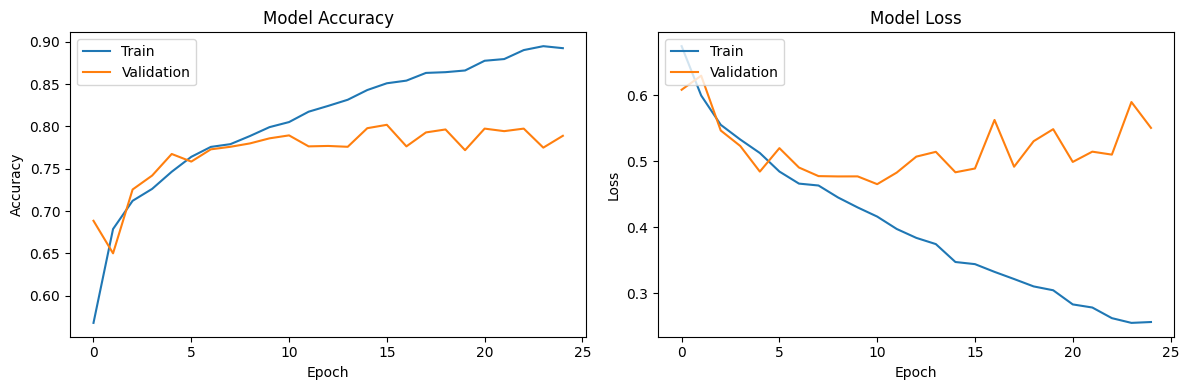

In [11]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

### Image Predictions

1/1 [==============================] - 0s 143ms/step


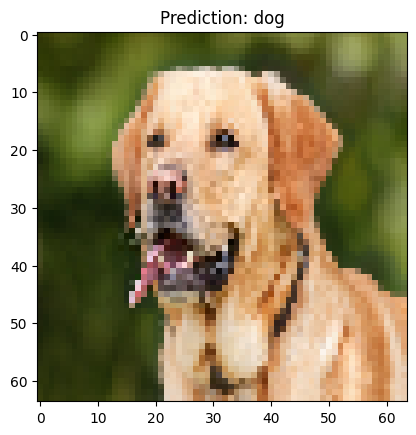

In [12]:
test_image=image.load_img("D:\\chrome downloads\\image_dataset\\single_prediction\\cat_or_dog_1.jpg"
                          ,target_size=(64,64))
test_img_array=image.img_to_array(test_image)
test_img_array=np.expand_dims(test_img_array,axis=0)
result=cnn.predict(test_img_array)


if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

plt.imshow(test_image)
plt.title(f'Prediction: {prediction}')
plt.show()

1/1 [==============================] - 0s 28ms/step
4.5322913e-06


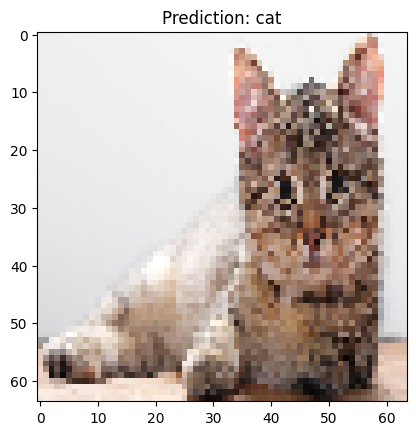

In [13]:
test_image=image.load_img("D:\chrome downloads\image_dataset\single_prediction\cat_or_dog_2.jpg"
                          ,target_size=(64,64))
test_img_array=image.img_to_array(test_image)
test_img_array=np.expand_dims(test_img_array,axis=0)
result=cnn.predict(test_img_array)


if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

print(result[0][0])
plt.imshow(test_image)
plt.title(f'Prediction: {prediction}')
plt.show()